回帰

## 必要なライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# 予測したいデータの読み込み
path_test_preprp = '../../../../data/processed/test_processed_20.csv'

test = pd.read_csv(path_test_preprp)

## 保存されたモデルを使って予測を行う

In [3]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_20/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [4]:
# 予測結果を出力する
print(predictions)

[-2.04184837 -0.2304551  -0.7127363  ...  0.91878772 -2.72491461
  0.10492172]


## 提出用ファイルの作成

In [5]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_20.csv", index=False)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00,
        5.0000e+00, 6.0000e+00, 4.0000e+00, 1.0000e+00, 6.0000e+00,
        6.0000e+00, 5.0000e+00, 5.0000e+00, 8.0000e+00, 1.0000e+01,
        8.0000e+00, 1.0000e+01, 1.0000e+01, 6.0000e+00, 6.0000e+00,
        1.1000e+01, 1.3000e+01, 1.6000e+01, 1.6000e+01, 2.0000e+01,
        2.3000e+01, 2.2000e+01, 9.0000e+00, 2.2000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 3.6000e+01, 2.1000e+01, 3.5000e+01,
        3.7000e+01, 2.4000e+01, 2.3000e+01, 3.1000e+01, 2.8000e+01,
        5.1000e+01, 4.0000e+01, 4.6000e+01, 4.4000e+01, 5.3000e+01,
        6.7000e+01, 6.7000e+01, 8.9000e+01, 9.3000e+01, 6.1000e+01,
        9.5000e+01, 9.8000e+01, 1.0900e+02, 1.4100e+02, 1.4000e+02,
        1.5300e+02, 1.7300e+02, 2.1300e+02, 2.6700e+02, 2.9000e+02,
        3.1500e+02, 4.1400e+02, 4.4900e+02, 5.5400e+02, 6.1800e+02,
        8.0100e+02, 9.3600e+02, 1.1330e+03, 1.49

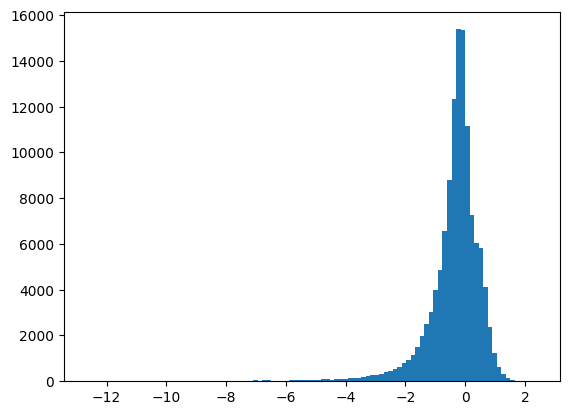

In [8]:
import matplotlib.pyplot as plt

plt.hist(sub_df.target, bins=100)

In [7]:
sub_df

,card_id,target
0,C_ID_0ab67a22ab,-2.035634
1,C_ID_130fd0cbdd,-0.091265
2,C_ID_b709037bc5,0.311744
3,C_ID_d27d835a9f,-0.185853
4,C_ID_2b5e3df5c2,-0.158231
...,...,...
123618,C_ID_7a239d2eda,0.767411
123619,C_ID_75ace375ae,0.269988
123620,C_ID_21d56d950c,1.052272
123621,C_ID_6c46fc5a9d,-2.541991
